In [1]:
from mhr.utils.utils import *
from tqdm import tqdm

statistic_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reformed_data/origin_data/llava_v1_5_mix665k.json"
statistic_data = load_json_file(statistic_file)

In [2]:

object_dict,token_dict,co_occurrence_dict,what_word_dict = {},{},{},{}
for item in tqdm(statistic_data):
    statistic = item["statistics"]
    for object_item in statistic["object"]:
        object_dict[object_item] = object_dict.get(object_item,0)+1
    for token_item in statistic["token"]:
        token_dict[token_item] = token_dict.get(token_item,0)+1
    for co_occurrence_item in statistic["co_occurrence"]:
        co_occurrence_dict[co_occurrence_item] = co_occurrence_dict.get(co_occurrence_item,0)+1
    for what_word_item in statistic["what_word"]:
        what_word_dict[what_word_item] = what_word_dict.get(what_word_item,0)+1

object_list = sorted(object_dict.items(),key=lambda x:x[1],reverse=True)
token_list = sorted(token_dict.items(),key=lambda x:x[1],reverse=True)
co_occurrence_list = sorted(co_occurrence_dict.items(),key=lambda x:x[1],reverse=True)
what_word_list = sorted(what_word_dict.items(),key=lambda x:x[1],reverse=True)

print(co_occurrence_list[:10])
what_word_list.pop(13)
    

  3%|▎         | 19190/665298 [00:00<00:03, 191867.70it/s]

100%|██████████| 665298/665298 [00:04<00:00, 138849.19it/s]


[('book,image', 7393), ('man,woman', 5897), ('girl,woman', 5335), ('left,right', 3992), ('man,photo', 3677), ('chair,table', 3607), ('head,man', 3300), ('photo,right', 2915), ('hair,man', 2818), ('left,man', 2770)]


('', 25140)

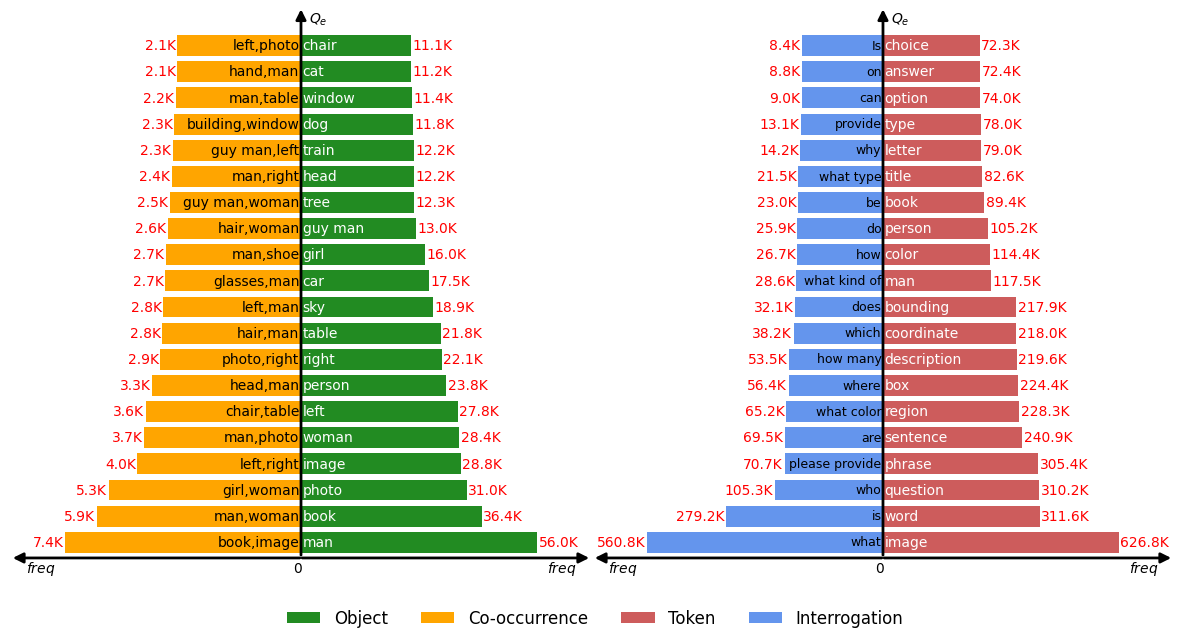

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# 示例数据
num_of_rows = 20
slide_ratio = 0.5
margin_size = 0.35
x_axis_length=1.85
age_groups = [i for i in range(num_of_rows)]
object_num = [x[1] for x in object_list[:num_of_rows]]
object_ratio = [x/max(object_num) for x in object_num]
object_ratio = [x+slide_ratio for x in object_ratio]
object_name = [x[0] for x in object_list[:num_of_rows]]


co_occurrence_num = [x[1] for x in co_occurrence_list[:num_of_rows]]
co_occurrence_ratio = [x/max(co_occurrence_num) for x in co_occurrence_num]
co_occurrence_ratio = [x+slide_ratio for x in co_occurrence_ratio]
co_occurrence_name = [x[0] for x in co_occurrence_list[:num_of_rows]]

colors = [ "#228b22","#ffA500","#cd5c5c","#6495ed", '#87edff', '#ff968d', '#b2ff89','#bc9eff','#bdbca5','#ffe598', 'grey', 'yellow','k','brown','grey','cyan',"pink"]
# 创建一个水平条形图
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6),gridspec_kw={'wspace': 0})
ax = axes[0]

# 绘制男性数据
bar_males = ax.barh(age_groups, object_ratio, color=colors.pop(0), label='Object')
# 绘制女性数据，数值取负以向左绘制
bar_females = ax.barh(age_groups, [-x for x in co_occurrence_ratio], color=colors.pop(0), label='Co-occurrence')
max_value = max(max(object_ratio),max(co_occurrence_ratio))
ax.set_xlim(-max_value-margin_size, max_value+margin_size)
ax.set_xlabel('Population')
# ax.set_title('Population Pyramid')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# ax.legend()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0), shadow=True, ncol=2)

# 在每个条上添加文本标注
for idx,bar in enumerate(bar_males):
    width = bar.get_width()  # 获取条形的宽度
    label_x_pos = 0+0.01  # 设置标签的x位置稍微偏右，避免贴在条形上
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, object_name[idx], va='center',ha="left", color='white')

for idx,bar in enumerate(bar_females):
    width = bar.get_width()  # 获取条形的宽度
    label_x_pos = 0-0.01  # 设置标签的x位置稍微偏左，避免贴在条形上
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, co_occurrence_name[idx], va='center',ha="right",)
    
for idx,bar in enumerate(bar_males):
    width = bar.get_width()  # 获取条形的宽度
    label_x_pos = width+0.01  # 设置标签的x位置稍微偏右，避免贴在条形上
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{object_num[idx]/1000:.1f}K", va='center',ha="left", color='red')

for idx,bar in enumerate(bar_females):
    width = bar.get_width()  # 获取条形的宽度
    label_x_pos = width-0.01  # 设置标签的x位置稍微偏左，避免贴在条形上
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{co_occurrence_num[idx]/1000:.1f}K", va='center',ha="right", color='red')


token_num = [x[1] for x in token_list[:num_of_rows]]
token_name = [x[0] for x in token_list[:num_of_rows]]
token_ratio = [x/max(token_num) for x in token_num]
token_ratio = [x+slide_ratio for x in token_ratio]

what_word_num = [x[1] for x in what_word_list[:num_of_rows]]
what_word_name = [x[0] for x in what_word_list[:num_of_rows]]
what_word_ratio = [x/max(what_word_num) for x in what_word_num]
what_word_ratio = [x+slide_ratio for x in what_word_ratio]


ax1 = axes[1]
# 绘制男性数据
bar_males = ax1.barh(age_groups, token_ratio, color=colors.pop(0), label='Token')
# 绘制女性数据，数值取负以向左绘制
bar_females = ax1.barh(age_groups, [-x for x in what_word_ratio], color=colors.pop(0), label='Interrogation')
max_value = max(max(token_ratio),max(what_word_ratio))
ax1.set_xlim(-max_value-margin_size, max_value+margin_size)
ax1.set_xlabel('Population')
# ax.set_title('Population Pyramid')
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
# ax.legend()


# 在每个条上添加文本标注
for idx,bar in enumerate(bar_males):
    width = bar.get_width()  # 获取条形的宽度
    label_x_pos = 0.01  # 设置标签的x位置稍微偏右，避免贴在条形上
    ax1.text(label_x_pos, bar.get_y() + bar.get_height()/2, token_name[idx], va='center',ha="left", color='white')

for idx,bar in enumerate(bar_females):
    width = bar.get_width()  # 获取条形的宽度
    label_x_pos = -0.01  # 设置标签的x位置稍微偏左，避免贴在条形上
    ax1.text(label_x_pos, bar.get_y() + bar.get_height()/2, what_word_name[idx], va='center',ha="right",fontsize=9)
    
for idx,bar in enumerate(bar_males):
    width = bar.get_width()  # 获取条形的宽度
    label_x_pos = width+0.01  # 设置标签的x位置稍微偏右，避免贴在条形上
    ax1.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{token_num[idx]/1000:.1f}K", va='center',ha="left", color='red')

for idx,bar in enumerate(bar_females):
    width = bar.get_width()  # 获取条形的宽度
    label_x_pos = width-0.01  # 设置标签的x位置稍微偏左，避免贴在条形上
    ax1.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{what_word_num[idx]/1000:.1f}K", va='center',ha="right", color='red')
# 显示图形


# ax1.set_alpha(0.5)
# ax.axvspan(-2,2 , facecolor='peachpuff', alpha=0.5)
# ax1.axvspan(-2,2 , facecolor='lightblue', alpha=0.5)
ax.add_patch(FancyArrowPatch((-0.01, -0.6), (x_axis_length, -0.6), color='black', arrowstyle='-|>', mutation_scale=15,linewidth=2))
ax.add_patch(FancyArrowPatch((0.01, -0.6), (-x_axis_length, -0.6), color='black', arrowstyle='-|>', mutation_scale=15,linewidth=2))
ax.add_patch(FancyArrowPatch((0, -0.6), (0, num_of_rows+0.5), color='black', arrowstyle='-|>', mutation_scale=15,linewidth=2))

ax1.add_patch(FancyArrowPatch((-0.01, -0.6), (x_axis_length, -0.6), color='black', arrowstyle='-|>', mutation_scale=15,linewidth=2))
ax1.add_patch(FancyArrowPatch((0.01, -0.6), (-x_axis_length, -0.6), color='black', arrowstyle='-|>', mutation_scale=15,linewidth=2))
ax1.add_patch(FancyArrowPatch((0, -0.6), (0, num_of_rows+0.5), color='black', arrowstyle='-|>', mutation_scale=15,linewidth=2))
ax.text(0.05, num_of_rows, f"$Q_e$", va='center',ha="left", color='black')
ax1.text(0.05, num_of_rows, f"$Q_e$", va='center',ha="left", color='black')
ax.text(-0.05, -1, f"$0$", va='center',ha="left", color='black')
ax1.text(-0.05, -1, f"$0$", va='center',ha="left", color='black')
text_sign_loc = x_axis_length - 0.1
ax.text(-text_sign_loc, -1, f"$freq$", va='center',ha="left", color='black')
ax1.text(-text_sign_loc, -1, f"$freq$", va='center',ha="left", color='black')
ax.text(text_sign_loc, -1, f"$freq$", va='center',ha="right", color='black')
ax1.text(text_sign_loc, -1, f"$freq$", va='center',ha="right", color='black')
# ax.text(1.1, 0.75*num_of_rows, f"Visual", va='center',ha="left", color='black',fontsize=18)
# ax1.text(-1,  0.75*num_of_rows, f"Language", va='center',ha="right", color='black',fontsize=18)
plt.tight_layout()
# ax.grid(True, color='black', linestyle='--', linewidth=0.5)
# ax.set_facecolor('#F0F0F0')
# ax1.set_facecolor('#F0F0F0')
# ax.set_title("Visual")
# ax1.set_title("Language")
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0), shadow=True, ncol=4,frameon=False,fontsize='large')
plt.show()
fig.savefig('./res/top20_entities.pdf', format='pdf',bbox_inches='tight')